<a href="https://colab.research.google.com/github/AmirMohamadBabaee/TF-sign-language-number-detection/blob/main/sign_language_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language Number Detection
In this notebook, I gonna implement a tensorflow model to detect the number that shown in pictures in sign language.

## Import Modules

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

## check the version of Tensorflow

In [ ]:
tf.__version__

'2.8.0'

## Download Dataset

In [ ]:
!gdown --id 1UT_9id3u08GwOO4lW1-BQffqIsl8j7VY

Downloading...
From: https://drive.google.com/uc?id=1UT_9id3u08GwOO4lW1-BQffqIsl8j7VY
To: /content/finger digit.zip
100% 17.8M/17.8M [00:00<00:00, 76.0MB/s]


## Unzip Dataset and check it

In [ ]:
!mkdir finger_digit
!unzip 'finger digit.zip' -d ./finger_digit

In [ ]:
train_data = os.listdir('./finger_digit/train')
test_data = os.listdir('./finger_digit/test')

In [ ]:
class_extractor = lambda x : int((x.split('.')[0]).split('_')[-1])
train_class_label = list(map(class_extractor, train_data))

## Preprocess Dataset

tf.Tensor(b'./finger_digit/train/7593_2.png', shape=(), dtype=string)
tf.Tensor(b'./finger_digit/train/4693_3.png', shape=(), dtype=string)
tf.Tensor(b'./finger_digit/train/4149_2.png', shape=(), dtype=string)
tf.Tensor(b'./finger_digit/train/7215_4.png', shape=(), dtype=string)
tf.Tensor(b'./finger_digit/train/4299_5.png', shape=(), dtype=string)


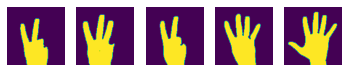

In [117]:
list_ds = tf.data.Dataset.list_files(str('./finger_digit/train/*.png'))
i=0
for f in list_ds.take(5):
  print(f)
  i += 1
  image = tf.io.read_file(f)
  image = tf.io.decode_png(image)
  plt.subplot(1, 5, i)
  plt.axis(False)
  plt.imshow(tf.reshape(image, (128, 128)))

tf.Tensor(b'./finger_digit/test/1471.png', shape=(), dtype=string)
tf.Tensor(b'./finger_digit/test/1097.png', shape=(), dtype=string)
tf.Tensor(b'./finger_digit/test/468.png', shape=(), dtype=string)
tf.Tensor(b'./finger_digit/test/1138.png', shape=(), dtype=string)
tf.Tensor(b'./finger_digit/test/2922.png', shape=(), dtype=string)


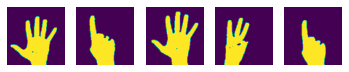

In [116]:
list_test_ds = tf.data.Dataset.list_files(str('./finger_digit/test/*.png'))
i=0
for f in list_test_ds.take(5):
  print(f)
  i += 1
  image = tf.io.read_file(f)
  image = tf.io.decode_png(image)
  plt.subplot(1, 5, i)
  plt.axis(False)
  plt.imshow(tf.reshape(image, (128, 128)))

(<tf.Tensor: shape=(128, 128, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>, <tf.Tensor: shape=(), dtype=int32, numpy=3>)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


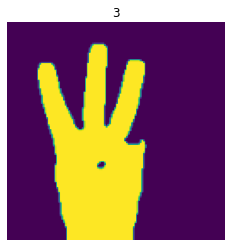

In [106]:
def preprocess_dataset(file_path):
  image_label = tf.strings.split(tf.strings.split(tf.strings.split(file_path, '/')[-1], '.')[0], '_')[-1]
  image_label = int(image_label)
  image = tf.io.read_file(file_path)
  image = tf.io.decode_png(image)
  image = image / 255
  return image, image_label

train_ds = list_ds.map(preprocess_dataset)
for data in train_ds.take(1):
  print(data)
  print(tf.math.reduce_max(data[0]))
  print(tf.math.reduce_min(data[0]))
  plt.title(f'{data[1]}')
  plt.axis(False)
  plt.imshow(tf.reshape(data[0], (128, 128)))

tf.Tensor(
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]], shape=(128, 128, 1), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


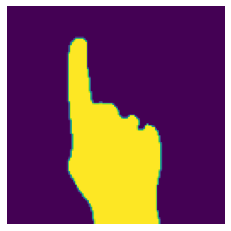

In [119]:
def preprocess_test_dataset(file_path):
  image = tf.io.read_file(file_path)
  image = tf.io.decode_png(image)
  image = image / 255
  return image

test_ds = list_test_ds.map(preprocess_test_dataset)
for data in test_ds.take(1):
  print(data)
  print(tf.math.reduce_max(data))
  print(tf.math.reduce_min(data))
  plt.axis(False)
  plt.imshow(tf.reshape(data, (128, 128)))

In [109]:
def configure_for_performance(ds, batch_size):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

In [111]:
train_ds = configure_for_performance(train_ds, 32)

## Train Model

In [107]:
model = tf.keras.models.Sequential([
  # keras.layers.Conv2D(16, 3, input_shape=(128, 128, 1)),
  # keras.layers.MaxPool2D(),
  # keras.layers.Conv2D(32, 3),
  # keras.layers.MaxPool2D(),
  # keras.layers.Conv2D(64, 3),
  # keras.layers.MaxPool2D(),
  keras.layers.Flatten(input_shape=(128, 128, 1)),
  # keras.layers.Dense(16, activation='relu'),
  # keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(6, activation='softmax')
])

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 6)                 98310     
                                                                 
Total params: 98,310
Trainable params: 98,310
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [114]:
model.fit(train_ds, epochs=10, batch_size=32)

Epoch 1/10
241/241 [==============================] - 4s 10ms/step - loss: 0.0116 - accuracy: 0.9958
Epoch 2/10
241/241 [==============================] - 2s 9ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 3/10
241/241 [==============================] - 2s 9ms/step - loss: 4.3986e-05 - accuracy: 1.0000
Epoch 4/10
241/241 [==============================] - 3s 10ms/step - loss: 3.5165e-05 - accuracy: 1.0000
Epoch 5/10
241/241 [==============================] - 1s 6ms/step - loss: 2.7819e-05 - accuracy: 1.0000
Epoch 6/10
241/241 [==============================] - 1s 6ms/step - loss: 2.4061e-05 - accuracy: 1.0000
Epoch 7/10
241/241 [==============================] - 1s 6ms/step - loss: 2.0987e-05 - accuracy: 1.0000
Epoch 8/10
241/241 [==============================] - 1s 6ms/step - loss: 1.8941e-05 - accuracy: 1.0000
Epoch 9/10
241/241 [==============================] - 1s 6ms/step - loss: 1.7069e-05 - accuracy: 1.0000
Epoch 10/10
241/241 [==============================] - 1s 6ms/step - l

In [83]:
# train_ds.batch(32)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  # print(model.predict(image_batch))
  break

next(train_ds.as_numpy_iterator())[1].shape

(128, 128, 1)
(6,)


(6,)

## Model Evaluation

In [135]:
test_predicted = model.predict(test_ds, batch_size=32)

In [144]:
predicted = np.argmax(test_predicted, axis=1)
compound_ds = tf.data.Dataset.zip((test_ds, tf.data.Dataset.from_tensor_slices(tf.convert_to_tensor(predicted))))

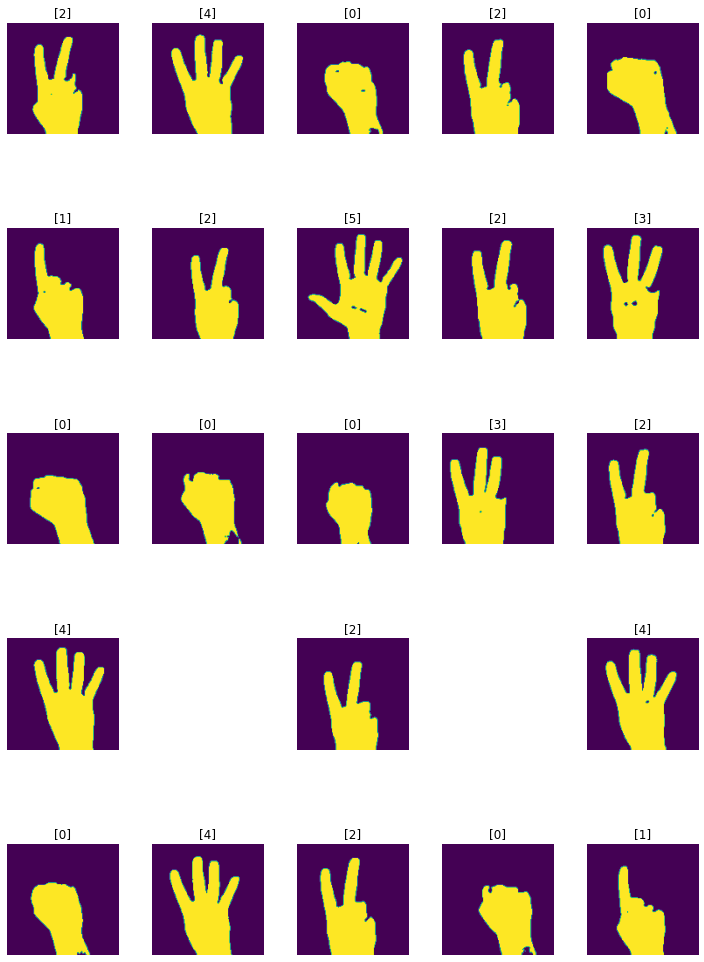

In [162]:
i = 0
plt.figure(figsize=(10, 15))
for im in test_ds.take(25):
  p = np.argmax(model.predict(tf.reshape(im, (1, 128, 128, 1))), axis=1)
  plt.subplot(5, 5, i+1)
  plt.tight_layout()
  plt.title(f"{p}")
  plt.axis(False)
  plt.imshow(tf.reshape(im, (128, 128)))
  i += 1